In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
warnings.filterwarnings("ignore")

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df.size

3582

In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [10]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

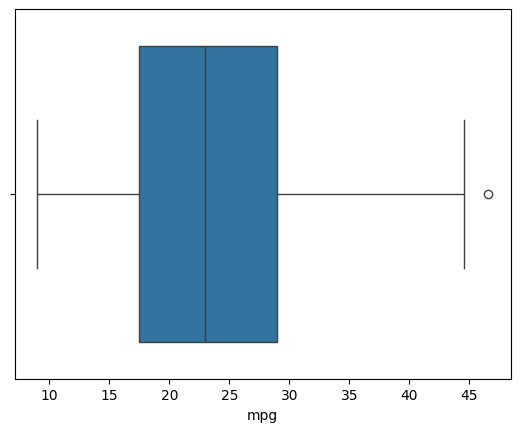

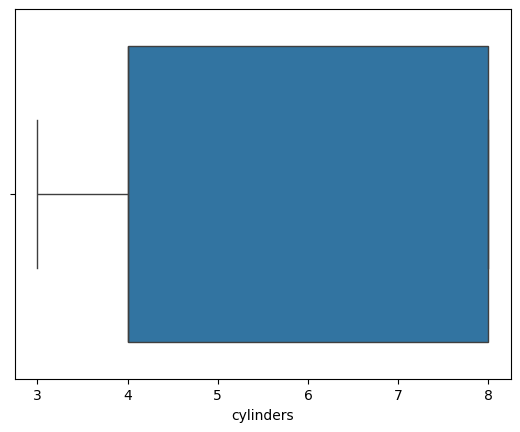

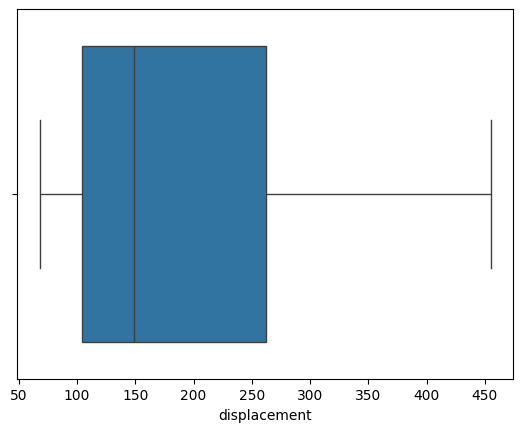

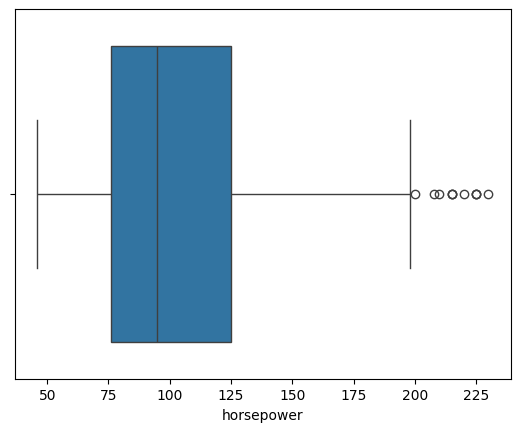

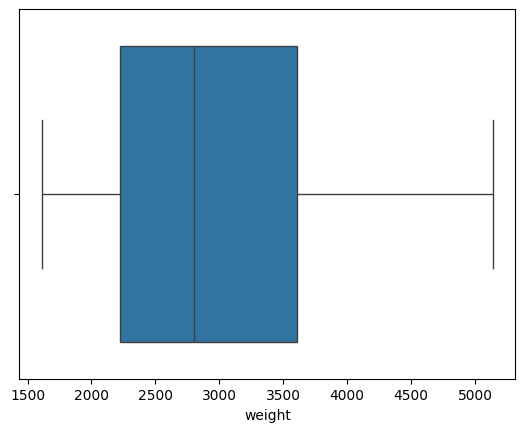

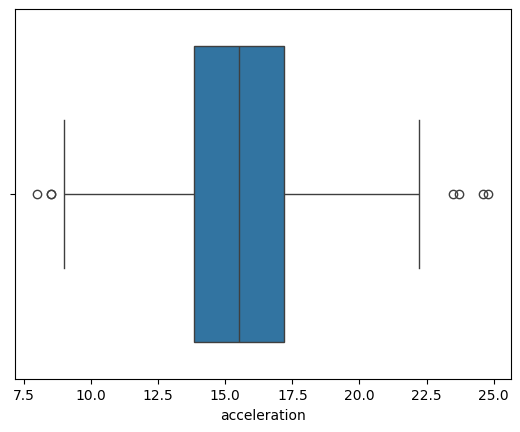

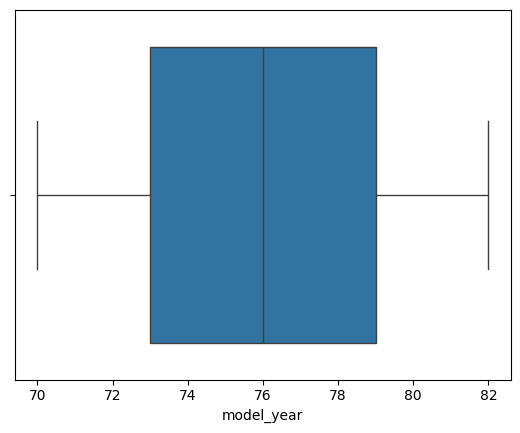

In [13]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])        
    plt.show()

In [14]:
Q1=df['mpg'].quantile(0.25)
Q3=df['mpg'].quantile(0.75)

IQR=Q3-Q1

#Define outlier boundaries

ll=Q1-1.5*IQR
ul=Q3+1.5*IQR

#Remove Outlier 

df_no_outlier=df[(df['mpg']>=ll)& (df['mpg']<=ul)]
print(df_no_outlier)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

In [15]:
df['mpg'] = df['mpg'].astype(int)
df['mpg'].dtype

dtype('int64')

In [16]:
df.dtypes

mpg               int64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

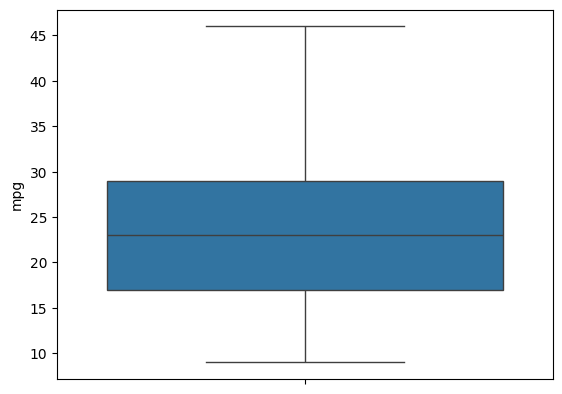

In [17]:
sns.boxplot(df['mpg'])
plt.show()

In [18]:
Q1=df['mpg'].quantile(0.25)
Q3=df['mpg'].quantile(0.75)

IQR=Q3-Q1

#Define outlier boundaries

ll=Q1-1.5*IQR
ul=Q3+1.5*IQR

#Remove Outlier 

df_no_outlier=df[(df['mpg']>=ll)& (df['mpg']<=ul)]
print(df_no_outlier)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0     18          8         307.0       130.0    3504          12.0   
1     15          8         350.0       165.0    3693          11.5   
2     18          8         318.0       150.0    3436          11.0   
3     16          8         304.0       150.0    3433          12.0   
4     17          8         302.0       140.0    3449          10.5   
..   ...        ...           ...         ...     ...           ...   
393   27          4         140.0        86.0    2790          15.6   
394   44          4          97.0        52.0    2130          24.6   
395   32          4         135.0        84.0    2295          11.6   
396   28          4         120.0        79.0    2625          18.6   
397   31          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick sk

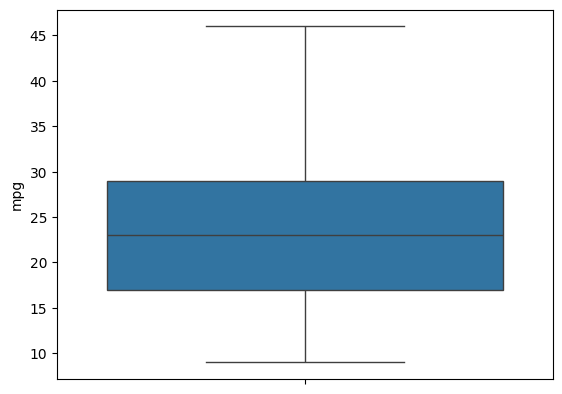

In [19]:
sns.boxplot(df['mpg'])
plt.show()

In [20]:
df['acceleration'] = df['acceleration'].astype(int)
df['acceleration'].dtype

dtype('int64')

In [21]:
#Q4=df['mpg'].quantile(0.25)
#Q6=df['mpg'].quantile(0.75)

#IQR=Q4-Q6

#Define outlier boundaries

#ll=Q4-1.5*IQR
#ul=Q6+1.5*IQR

#Remove Outlier 

#df_no_outlier=df[(df['mpg']>=ll)& (df['mpg']<=ul)]
#print(df_no_outlier)

In [22]:
q1 = df['acceleration'].quantile(0.25)
q3 = df['acceleration'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['acceleration'] = df['acceleration'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(23.0), np.float64(7.0))

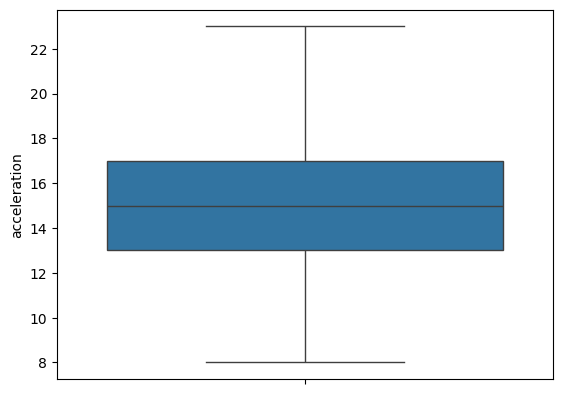

In [23]:
sns.boxplot(df['acceleration'])
plt.show()

In [24]:
df['horsepower'] = df['horsepower'].astype(int)
df['horsepower'].dtype

dtype('int64')

In [25]:
q1 = df['horsepower'].quantile(0.25)
q3 = df['horsepower'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['horsepower'] = df['horsepower'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(198.5), np.float64(2.5))

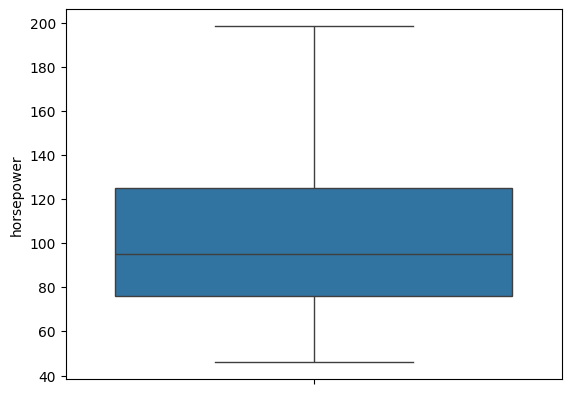

In [26]:
sns.boxplot(df['horsepower'])
plt.show()

In [27]:
encoder = LabelEncoder()
df['name']=df['name'] = encoder.fit_transform(df['origin'])
df['name'].value_counts()

name
2    249
1     79
0     70
Name: count, dtype: int64

In [28]:
encoder = LabelEncoder()
df['origin']=df['origin'] = encoder.fit_transform(df['origin'])
df['origin'].value_counts()

origin
2    249
1     79
0     70
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x=df.drop('mpg',axis=1)
y=df['mpg']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # 42 is best for better accuracy
print("Train set:",x_train.shape,y_train.shape)
print("Test set:",x_test.shape,y_train.shape)

Train set: (318, 8) (318,)
Test set: (80, 8) (318,)


In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('mpg', axis=1) 
y = df['mpg']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (318, 8) (318,)
Test set: (80, 8) (80,)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2.413830978539012
MSE: 8.747642873398858
R² Score: 0.835450284101823


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
# Train Decision Tree Refressor
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)

dt_pred=dt_model.predict(x_test)
print("Descision Tree Regression")
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_absolute_error(y_test,dt_pred))
print("R2 Score:",r2_score(y_test,dt_pred))

Descision Tree Regression
MAE: 2.413830978539012
MSE: 2.75
R2 Score: 0.7248927934256433


In [34]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

rf_preds=rf_model.predict(x_test)
print("Random Forest Performance")
print("MSE:",mean_absolute_error(y_test,rf_preds))
print("R2 Score:",r2_score(y_test,rf_preds))

Random Forest Performance
MSE: 1.575625
R2 Score: 0.9118778712110301


In [35]:
summary=pd.DataFrame({
    'Actual MPG':y_test,
    'Decision Tree Prediction':dt_pred,
    'Random forest prediction':rf_preds,
})
print('\nPrediction Summary\n')
print(summary.head())


Prediction Summary

     Actual MPG  Decision Tree Prediction  Random forest prediction
198          33                      30.0                     30.63
396          28                      26.0                     29.21
33           19                      21.0                     19.65
208          13                      15.0                     14.55
93           14                      17.0                     14.20


In [36]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
#import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Gradient Boosting Regression 

gbr =GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gbr.fit(x_train,y_train)
y_pred_gbr=gbr.predict(x_test)
print("Gradient Boosting RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Gradient Boosting RMSE: 2.379998450221028


In [41]:
import xgboost as xgb
print(xgb.__version__)


2.1.4


In [42]:
xgbr=xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
xgbr.fit(x_train,y_train)
y_pred_xgbr=xgbr.predict(x_test)
print("XGBoost RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

XGBoost RMSE: 2.5792973482696824


In [37]:
abr=AdaBoostRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
abr.fit(x_train,y_train)
y_pred_abr=abr.predict(x_test)
print("AdaBoostRegressor RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_abr)))

AdaBoostRegressor RMSE: 2.770062626072097
